In [6]:
from pathlib import Path
import pickle

# Assuming src is in the python path or adjust sys.path if needed
import sys
sys.path.append('../')

# Find parent directory
root = Path().resolve().parent

# Collect pickle files
pickle_files = list(root.glob('*.pkl')) + list(root.glob('*.pickle'))
if not pickle_files:
    raise FileNotFoundError(f"No pickle files found in {root}")

# Identify the most recently modified one
latest_file = max(pickle_files, key=lambda p: p.stat().st_mtime)
print(f"Loading the most recent file: {latest_file}")

# Load it as episodes
with open(latest_file, 'rb') as f:
    episodes = pickle.load(f)

Loading the most recent file: E:\space-deck-builder\experiences_1000_20250418_000914.pkl


### Health Difference Distribution
Compute the net health difference between the first and second player for each episode and plot its distribution.

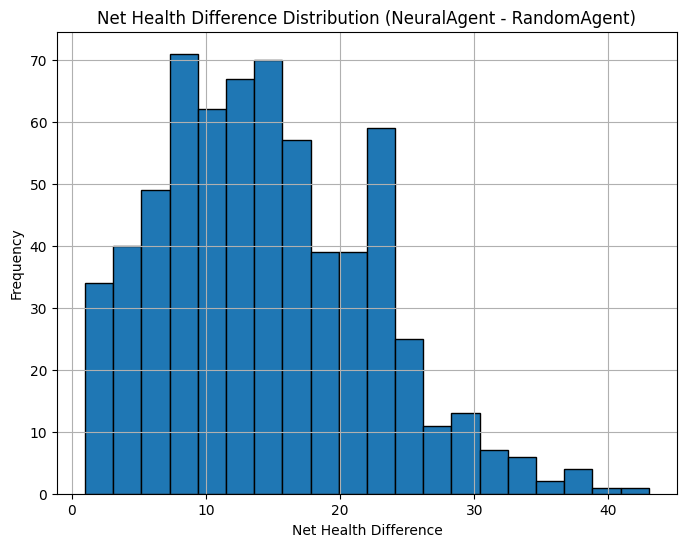

In [7]:
import matplotlib.pyplot as plt

# Identify player names from stats
first_name, second_name = list(episodes[0][1].player_stats.keys())

# Compute net health difference for each episode
diffs = []
for experiences, stats, winner in episodes:
    if winner == second_name:
        continue
    ps = stats.player_stats
    net1 = ps[first_name].authority_gained - ps[second_name].damage_dealt
    net2 = ps[second_name].authority_gained - ps[first_name].damage_dealt
    diffs.append(net1 - net2)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(diffs, bins=20, edgecolor='black')
plt.title(f'Net Health Difference Distribution ({first_name} - {second_name})')
plt.xlabel('Net Health Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Damage Dealt Distribution
Compute the total damage dealt by each player across all episodes and plot its distribution.

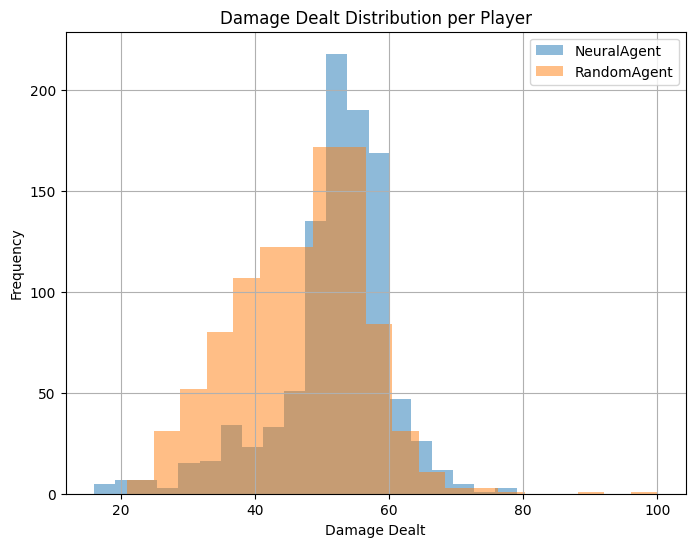

In [8]:
# Aggregate damage dealt per player
damage_data = {first_name: [], second_name: []}
for _, stats, _ in episodes:
    for name in [first_name, second_name]:
        damage_data[name].append(stats.player_stats[name].damage_dealt)

# Plot damage dealt distributions
plt.figure(figsize=(8, 6))
plt.hist(damage_data[first_name], bins=20, alpha=0.5, label=first_name)
plt.hist(damage_data[second_name], bins=20, alpha=0.5, label=second_name)
plt.title('Damage Dealt Distribution per Player')
plt.xlabel('Damage Dealt')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Authority Gained Distribution
Compute the total authority gained by each player across all episodes and plot its distribution.

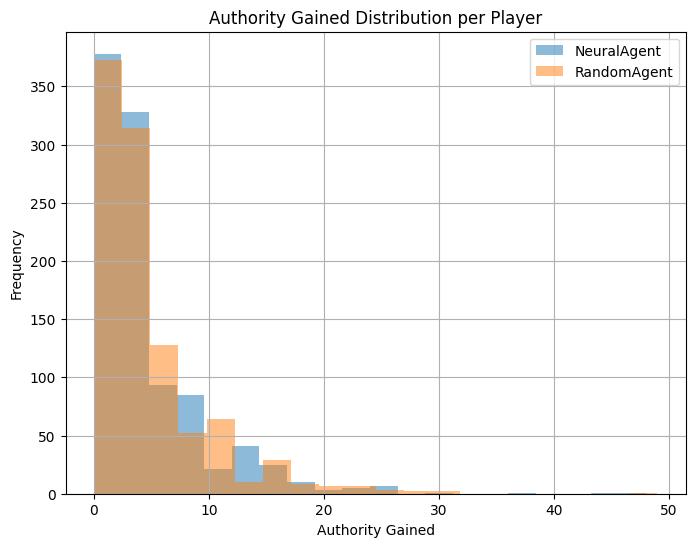

In [9]:
# Aggregate authority gained per player
auth_data = {first_name: [], second_name: []}
for _, stats, _ in episodes:
    for name in [first_name, second_name]:
        auth_data[name].append(stats.player_stats[name].authority_gained)

# Plot authority gained distributions
plt.figure(figsize=(8, 6))
plt.hist(auth_data[first_name], bins=20, alpha=0.5, label=first_name)
plt.hist(auth_data[second_name], bins=20, alpha=0.5, label=second_name)
plt.title('Authority Gained Distribution per Player')
plt.xlabel('Authority Gained')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

[LOADER]: Adding 1 copies of Core Set Battle Blob (6 cost) | Faction: Blob | Type: ship | Effects: Combat: 8, Blob Ally: Draw: 1, (Scrap required): Combat: 4
[LOADER]: Adding 2 copies of Core Set Battle Pod (2 cost) | Faction: Blob | Type: ship | Effects: Parent: [ Child Effects: Combat: 4, Scrap: 1 from ['trade'] ] , Blob Ally: Combat: 2
[LOADER]: Adding 1 copies of Core Set Blob Carrier (6 cost) | Faction: Blob | Type: ship | Effects: Combat: 7, Blob Ally: Complex: Acquire any ship for free and put it on top of your deck
[LOADER]: Adding 2 copies of Core Set Blob Destroyer (4 cost) | Faction: Blob | Type: ship | Effects: Combat: 6, Parent: [ Child Effects: Blob Ally: Destroy_base: 1, Blob Ally: Scrap: 1 from ['trade'] ] 
[LOADER]: Adding 3 copies of Core Set Blob Fighter (1 cost) | Faction: Blob | Type: ship | Effects: Combat: 3, Blob Ally: Draw: 1
[LOADER]: Adding 3 copies of Core Set Blob Wheel (3 cost) | Faction: Blob | Defense: 5 | Type: base | Effects: Combat: 1, (Scrap required

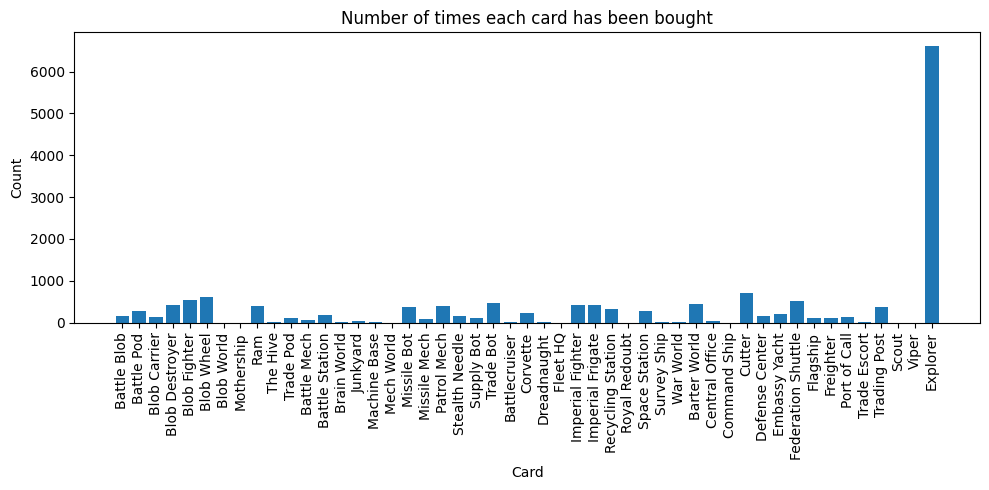

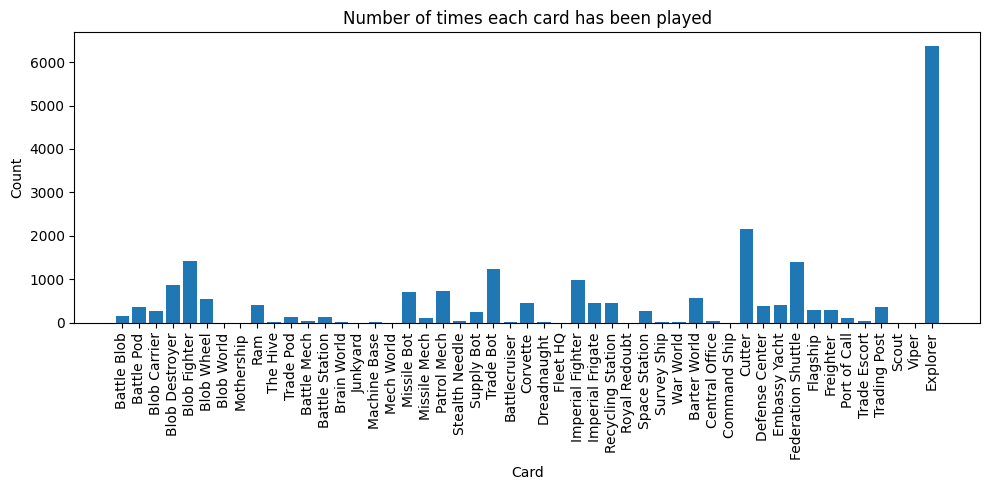

In [13]:
"""Analyzes actions in the agent's memory."""
from collections import Counter
import matplotlib.pyplot as plt
from src.cards.loader import load_trade_deck_cards

# Initialize counters for buy and play actions
buy_counts = Counter()
play_counts = Counter()
cards = [card.name for card in load_trade_deck_cards(file_path='../data/cards.csv')]
cards = list(dict.fromkeys(cards))
cards += ['Scout', 'Viper', 'Explorer']  # Add scout cards to the list
cards_length = len(cards)
# Define index ranges based on encoding scheme
start_play = 3
end_play = start_play + cards_length
start_buy = end_play
end_buy = start_buy + cards_length

all_episodes = [experiences_list for experiences_list, _, _ in episodes]

# Tally actions across all experiences
for episode in all_episodes:
    for exp in episode:
        idx = exp.action
        # Detect buy actions
        if start_buy <= idx < end_buy:
            card_idx = idx - start_buy
            if 0 <= card_idx < cards_length:
                buy_counts[cards[card_idx]] += 1
        # Detect play actions
        elif start_play <= idx < end_play:
            card_idx = idx - start_play
            if 0 <= card_idx < cards_length:
                play_counts[cards[card_idx]] += 1

# Remove scout and viper from play counts
for card in ['Scout', 'Viper']:
    play_counts.pop(card, None)

# Plot number of buys per card
labels = cards
buy_values = [buy_counts[c] for c in labels]
plt.figure(figsize=(10, 5))
plt.bar(labels, buy_values)
plt.title("Number of times each card has been bought")
plt.xlabel("Card")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot number of plays per card
play_values = [play_counts[c] for c in labels]
plt.figure(figsize=(10, 5))
plt.bar(labels, play_values)
plt.title("Number of times each card has been played")
plt.xlabel("Card")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

